# Lab 07: Uncertainty Visualization

**Objectives**
- Understand the role of uncertainty in data visualization.
- Differentiate between Standard Deviation (SD), Standard Error (SE), and Confidence Interval (CI).
- Visualize uncertainty using error bars, confidence bands, and interval plots.
- Interpret overlaps of confidence intervals and their significance.
- Compare Frequentist and Bayesian representations of uncertainty.
- Apply uncertainty visualization to regression and forecasting.

**Datasets Used:** Synthetic datasets (generated using NumPy and Pandas).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
np.random.seed(42)

## 1. Introduction to Uncertainty

Uncertainty is inherent in all data. It can arise from measurement errors, sampling variability, or model limitations.

**Why visualize uncertainty?**
- It communicates confidence (or lack thereof) in results.
- Prevents overinterpretation of data.
- Helps in decision-making under uncertainty.

Let's start with a simple comparison of two sample means — with and without uncertainty visualization.

In [ ]:
data_a = np.random.normal(50, 10, 1000)
data_b = np.random.normal(55, 10, 1000)

print(data_a[:10])
print(data_b[:10])

[53.5778736  55.60784526 60.83051243 60.53802052 36.22330632 40.6217496
 55.15035267 55.13785951 55.15047686 88.52731491]
[56.25224503 50.70594459 56.22297503 60.43298029 55.4886007  55.40591691
 47.98008312 48.37099082 40.97394728 72.49576743]


In [ ]:
print(np.mean(data_a), np.mean(data_b))

50.542128520557284 55.3093752089797


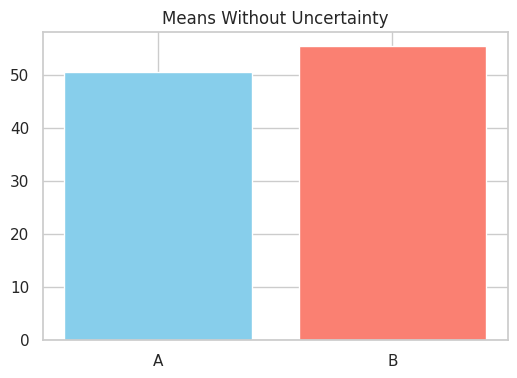

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['A','B'], [np.mean(data_a), np.mean(data_b)], color=['skyblue','salmon'])
plt.title('Means Without Uncertainty')
plt.show()

## 2. SD, SE, and CI

### Standard Deviation (SD)
Represents the spread of individual data points.

### Standard Error (SE)
Represents the uncertainty in estimating the *mean*.

### Confidence Interval (CI)
Gives a range where the true mean is likely to lie.

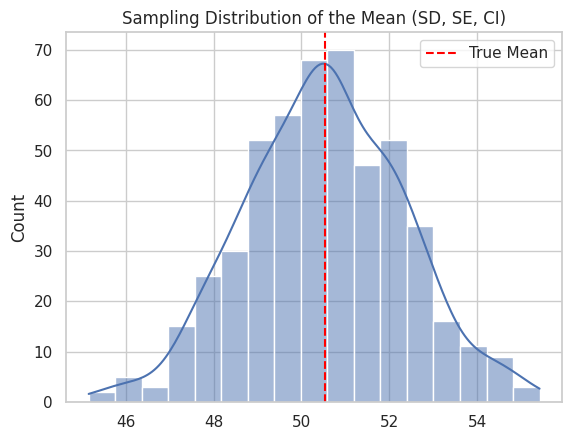

In [ ]:
means = []
for _ in range(500):
    sample = np.random.choice(data_a, 30)
    means.append(np.mean(sample))

sns.histplot(means, kde=True)
plt.axvline(np.mean(data_a), color='red', linestyle='--', label='True Mean')
plt.title('Sampling Distribution of the Mean (SD, SE, CI)')
plt.legend()
plt.show()

## 3. Error Bars and Interval Plots

Error bars are the simplest visual representation of uncertainty.  
They often show ±1 SD, ±1 SE, or 68% CI around a mean.

In [ ]:
means = [np.mean(data_a), np.mean(data_b)]
errors = [np.std(data_a)/np.sqrt(len(data_a)), np.std(data_b)/np.sqrt(len(data_b))]

In [ ]:
print(means)
print(errors)

[np.float64(50.542128520557284), np.float64(55.3093752089797)]
[np.float64(0.3158073754985316), np.float64(0.31189521313403173)]


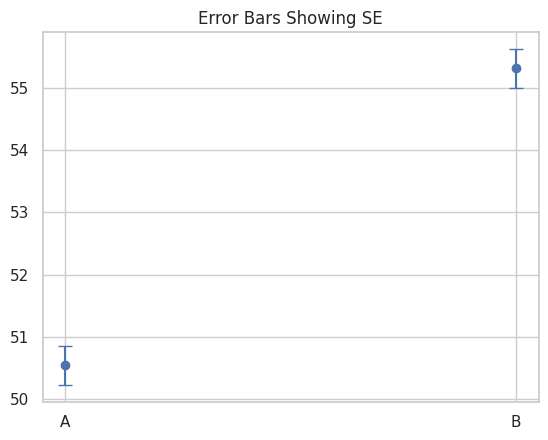

In [ ]:
plt.errorbar(['A', 'B'], means, yerr=errors, fmt='o', capsize=5)
plt.title('Error Bars Showing SE')
plt.show()

## 4. Frequency Framing

Uncertainty can also be shown as **frequencies** (e.g., “27 out of 100”).  
This framing helps people interpret probabilities more intuitively.

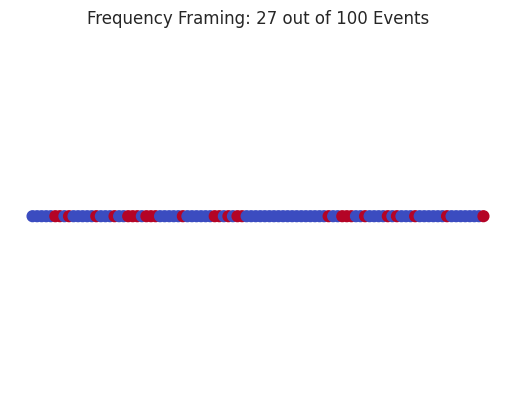

In [ ]:
p = 0.27
outcomes = np.random.choice([0,1], size=100, p=[1-p, p])
plt.scatter(range(100), [1]*100, c=outcomes, cmap='coolwarm', s=60)
plt.title('Frequency Framing: 27 out of 100 Events')
plt.axis('off')
plt.show()

## 5. Regression with Confidence Bands

Regression plots often show confidence intervals (CI) and prediction intervals (PI).  
CI shows uncertainty about the *mean estimate*, while PI shows uncertainty about *individual predictions*.

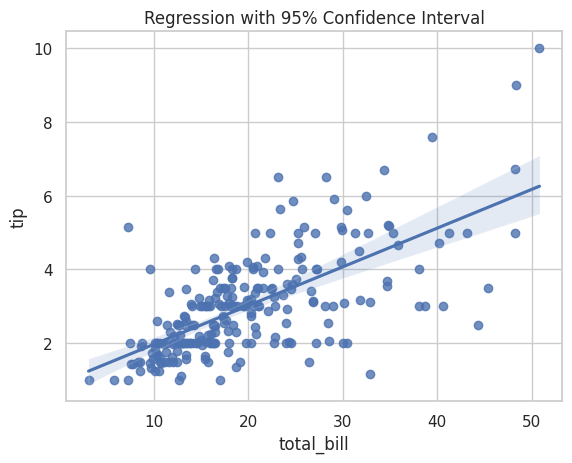

In [ ]:
df = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=df, ci=95)
plt.title('Regression with 95% Confidence Interval')
plt.show()

## 6. Bayesian vs Frequentist Visuals

Frequentist CI: '95% of intervals from repeated samples will contain the true mean.'  
Bayesian CI (credible interval): 'There’s a 95% probability that the true mean lies within this range.'

Let's visualize this conceptually using simulated posteriors.

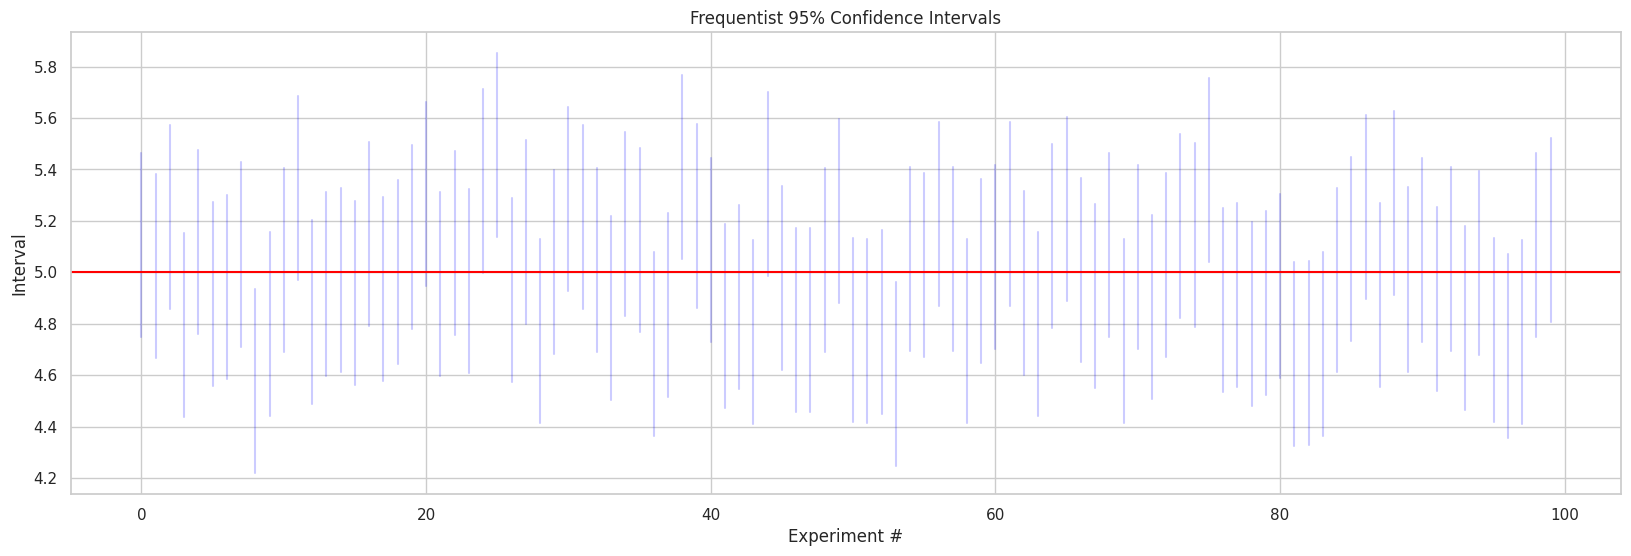

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_true = 5
sigma = 1
n = 30
reps = 100

cis = []

for _ in range(reps):
    sample = np.random.normal(mu_true, sigma, n)
    sample_mean = np.mean(sample)
    sample_se = sigma / np.sqrt(n)
    ci_lower = sample_mean - 1.96 * sample_se
    ci_upper = sample_mean + 1.96 * sample_se
    cis.append([ci_lower, ci_upper])

cis = np.array(cis)

plt.figure(figsize=(20,6))
for i in range(reps):
    plt.plot([i, i], cis[i], color='blue', alpha=0.20)
plt.axhline(mu_true, color='red', label='True mean')
plt.title('Frequentist 95% Confidence Intervals')
plt.xlabel('Experiment #')
plt.ylabel('Interval')
plt.show()

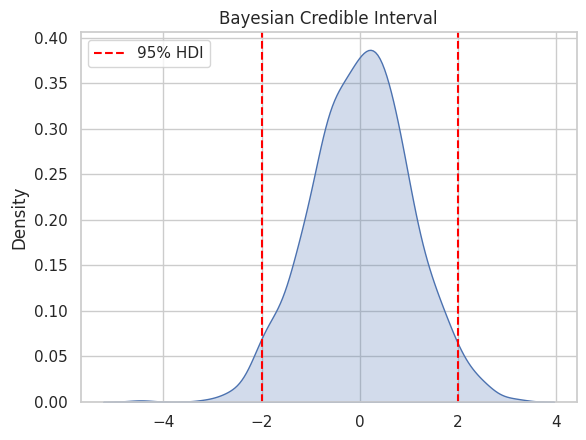

In [ ]:
posterior = np.random.normal(0, 1, 1000)
sns.kdeplot(posterior, fill=True)
plt.axvline(np.percentile(posterior, 2.5), color='red', linestyle='--', label='95% HDI')
plt.axvline(np.percentile(posterior, 97.5), color='red', linestyle='--')
plt.title('Bayesian Credible Interval')
plt.legend()
plt.show()